## **Notebook PC#04 (Part A)**
## Default MLP classifier for the MNIST and CIFAR-10 databases.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** <br>
**Aluno(a):**

##Training an MLP for the MNIST database

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5)
model.summary()
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

2024-04-10 13:40:23.050009: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-10 13:40:23.289055: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 13:40:23.289150: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 13:40:23.319555: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-10 13:40:23.395415: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/5


2024-04-10 13:40:29.133863: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-10 13:40:30.193743: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2f017291b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-10 13:40:30.193791: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-04-10 13:40:30.206519: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-10 13:40:30.239789: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1712767230.372640    3966 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 7s 2ms/step - loss: 0.2238 - accuracy: 0.9340
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1013 - accuracy: 0.9691
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0579 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0477 - accuracy: 0.9851
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 512)                 401920    
                                                                 
 dropout (Dropout)           (32, 512)                 0         
                       

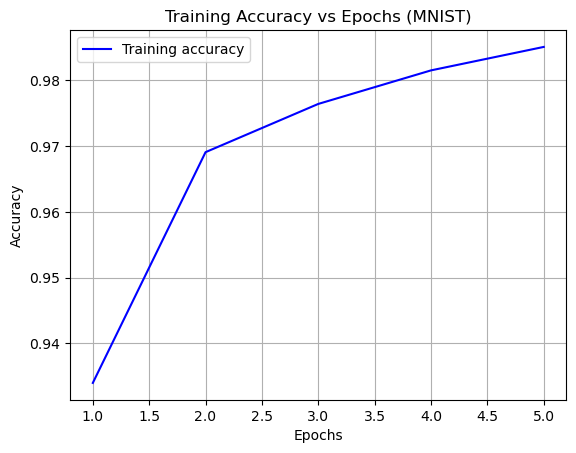

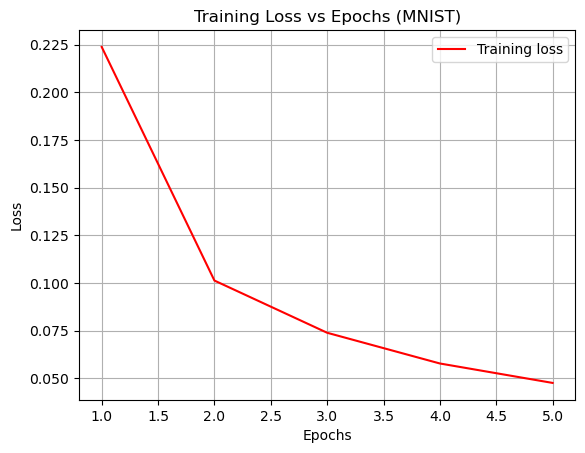

In [2]:
# Monitoring the training evolution along epochs

import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy vs Epochs (MNIST)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss vs Epochs (MNIST)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [3]:
# Saving the model to disk

import os

model_json = model.to_json()
json_file = open("model_MLP_MNIST.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_MLP_MNIST.h5")
print("Model saved to disk")
os.getcwd()

Model saved to disk


'/home/ariel/git/IA353_Redes_Neurais'

##Training an MLP for the CIFAR-10 database

In [4]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs=10)
model1.summary()
# Evaluate the model on the test data
print("Evaluate on test data")
results = model1.evaluate(x_test, y_test)
print("test loss, test acc:", results)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9772 - accuracy: 0.2970
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8289 - accuracy: 0.3379
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7853 - accuracy: 0.3587
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7546 - accuracy: 0.3684
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7339 - accuracy: 0.3752
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7144 - accuracy: 0.3831
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6985 - accuracy: 0.3884
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6821 - accuracy: 0.3983
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6812 - accuracy: 0.3944
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.666

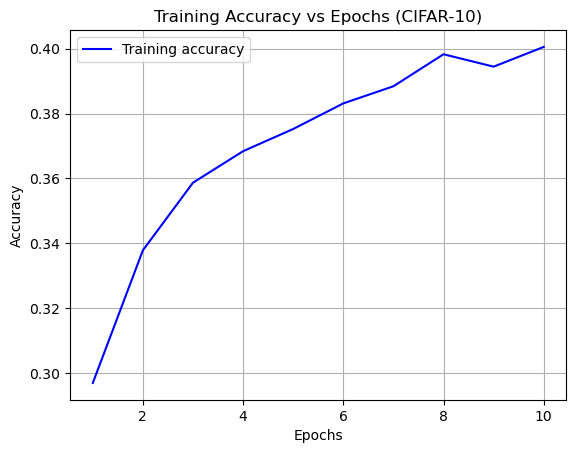

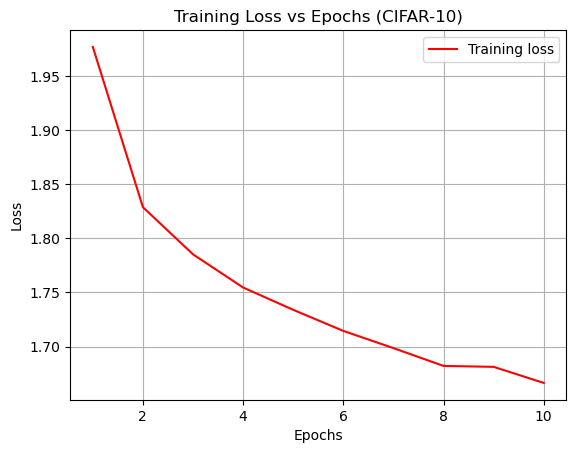

In [5]:
# Monitoring the training evolution along epochs

import matplotlib.pyplot as plt

acc = history1.history['accuracy']
loss = history1.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy vs Epochs (CIFAR-10)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss vs Epochs (CIFAR-10)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [6]:
# Saving the model to disk

import os

model_json = model1.to_json()
json_file = open("model_MLP_CIFAR10.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_MLP_CIFAR10.h5")
print("Model saved to disk")
os.getcwd()

Model saved to disk


'/home/ariel/git/IA353_Redes_Neurais'